In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [164]:
base = pd.read_csv('C:/Users/hbati/Ironhack/Cases/AME/base_de_conhecimento.csv')

In [165]:
base #describes each of the 129 questions asked

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree..."
...,...,...
124,Age,"What is your age? If you prefer not to answer,..."
125,Dependents,Do you have any children or other dependents t...
126,MilitaryUS,Are you currently serving or have you ever ser...
127,SurveyTooLong,How do you feel about the length of the survey...


In [166]:
data_ori = pd.read_csv('C:/Users/hbati/Ironhack/Cases/AME/survey_results_public.csv',low_memory=False)

In [167]:
data = pd.read_csv('C:/Users/hbati/Ironhack/Cases/AME/survey_results_public.csv',low_memory=False)

In [282]:
data #98855 entries

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,CSMR,StudentYN
0,Respondent_1,1,0,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy,0.000000,0.0
1,Respondent_2,1,1,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,18925.540035,0.0
2,Respondent_3,1,1,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
3,Respondent_4,0,0,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy,0.000000,0.0
4,Respondent_5,1,0,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,5724.066865,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98850,Respondent_98851,1,1,United States,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
98851,Respondent_98852,0,1,Spain,"Yes, full-time","Not employed, but looking for work",NaN,NaN,NaN,Back-end developer;Front-end developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0
98852,Respondent_98853,1,1,India,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0
98853,Respondent_98854,1,0,Russian Federation,No,"Independent contractor, freelancer, or self-em...",Some college/university study without earning ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0


<!--
• Salário vazio ou com valor “NA” deve ser convertido para zero (0.0).
    # done
• Salário deve ser sempre calculado em reais e mensal. Para esse cálculo você usará a coluna
ConvertedSalary, que contém o salário anual. Considere que 1 dólar equivale a R$3,81.
    # done, but with updated exchange rate of R$5,15
• O nome dos respondentes deve seguir a regra respondente_[número] . (ex: respondente_1,
respondente_2, respondente_3). O critério de geração desse número é todo seu.
• Cada linha da tabela linguagem_programacao deve conter uma única linguagem de
programação.
• Cada linha da tabela ferramenta_comunic deve conter apenas uma ferramenta de
comunicação.
-->

In [170]:
data[['Currency','Salary','SalaryType','ConvertedSalary']].isna().sum() # convert nans in Salary and Converted Salary to 0.0

# about half of salary information is lost

Currency           36847
Salary             48277
SalaryType         47785
ConvertedSalary    51153
dtype: int64

In [171]:
data['Salary'] = data['Salary'].fillna(0)
data['ConvertedSalary'] = data['ConvertedSalary'].fillna(0)

In [172]:
data[['Currency','Salary','SalaryType','ConvertedSalary']].isna().sum() # done

Currency           36847
Salary                 0
SalaryType         47785
ConvertedSalary        0
dtype: int64

In [279]:
# ConvertedSalaries must be wrong, as exemplified by
    # data.loc[data['Respondent']=='Respondent_4203'][['Respondent','Currency','Salary','SalaryType','ConvertedSalary','CSMR']]
    # and
    # data.loc[data['Respondent']=='Respondent_1450'][['Respondent','Currency','Salary','SalaryType','ConvertedSalary','CSMR']]

# let's fix the Salary column which is by far the most useful

DATA CLEANING

In [ ]:
# ordering Respondent data
data[['Respondent']].reset_index()

,index,Respondent
0,0,1
1,1,3
2,2,4
3,3,5
4,4,7
...,...,...
98850,98850,101513
98851,98851,101531
98852,98852,101541
98853,98853,101544


In [ ]:
data['Respondent'] = 'Respondent_' +(data['Respondent'].reset_index()['index'] + 1).astype(str)

In [ ]:
# Lets change Yes and No to 1 and 0 respectively
data['OpenSource'] = data['OpenSource'].replace({'No': 0, 'Yes': 1})
data['Hobby'] = data['Hobby'].replace({'No': 0, 'Yes': 1})

In [362]:
# lets pull the useful variables so its easier to work with
df = data[['Respondent','Country','Employment','CompanySize','OperatingSystem','DevType','YearsCoding',
'LanguageWorkedWith','CommunicationTools','ConvertedSalary','Gender','Age','Exercise','OpenSource','Hobby']]

print(df.shape)

(98855, 15)


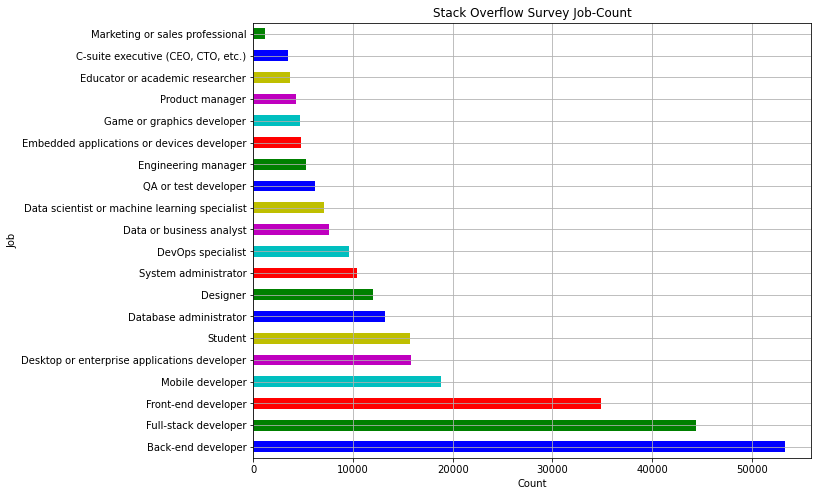

In [355]:
df_jobs = pd.DataFrame.from_records(df['DevType'].dropna().apply(lambda x: x.split(';')).values.tolist()).stack().reset_index(drop=True).value_counts()
c = ['b', 'g', 'r', 'c', 'm','y']

# Create plot
df_jobs.plot(kind='barh', figsize=(10,8),color = c)
plt.title('Stack Overflow Survey Job-Count')
plt.xlabel('Count')
plt.ylabel('Job')
plt.grid()
plt.show()

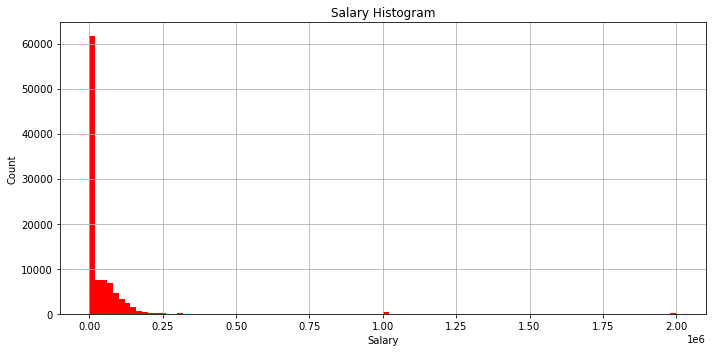

In [356]:
# Create subplots
fig, axarr = plt.subplots(figsize=(10,5))

# Create histogram
df['ConvertedSalary'].hist(bins=100, ax=axarr)
axarr.set_title('Salary Histogram')
axarr.set_xlabel('Salary')
axarr.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [367]:
# Remove the zeroes, and these outliers need to go. I'll cut anyone who makes more than half a million per year, that's just ridiculous.
# Actually only keep people who make >3000 USD/year. That should amount to those that get at least a minimum wage and we won't lose that many people
df = df[(df['ConvertedSalary']>3000) & (df['ConvertedSalary']<500000)]

In [368]:
df.shape # yeah ok that's not so bad

(40068, 15)

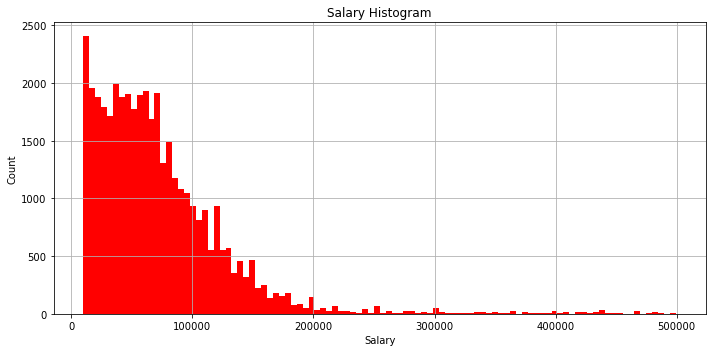

In [369]:
# Create subplots
fig, axarr = plt.subplots(figsize=(10,5))

# Create histogram
df['ConvertedSalary'].hist(bins=100, ax=axarr)
axarr.set_title('Salary Histogram')
axarr.set_xlabel('Salary')
axarr.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [347]:
data['Country'].value_counts()[0:20]

United States         20309
India                 13721
Germany                6459
United Kingdom         6221
Canada                 3393
Russian Federation     2869
France                 2572
Brazil                 2505
Poland                 2122
Australia              2018
Netherlands            1841
Spain                  1769
Italy                  1535
Ukraine                1279
Sweden                 1164
Pakistan               1050
China                  1037
Switzerland            1010
Turkey                 1004
Israel                 1003
Name: Country, dtype: int64

In [349]:
data['Country'].value_counts()[100:-1]

United Republic of Tanzania    49
El Salvador                    46
Iceland                        45
Bolivia                        44
Iraq                           42
                               ..
Nauru                           1
Sierra Leone                    1
Saint Lucia                     1
Solomon Islands                 1
Grenada                         1
Name: Country, Length: 82, dtype: int64

In [350]:
# For Gender, I might wanna keep only Males and Females.
df = df[df['Gender'].isin(['Male', 'Female'])]
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [353]:
df.head()

,Respondent,Country,Employment,CompanySize,OperatingSystem,DevType,YearsCoding,LanguageWorkedWith,CommunicationTools,ConvertedSalary,Gender,Age,Exercise
1,Respondent_2,United Kingdom,Employed full-time,"10,000 or more employees",Linux-based,Database administrator;DevOps specialist;Full-...,30 or more years,"[JavaScript, Python, Bash/Shell]","[Confluence, Office / productivity suite (Micr...",70841.0,0,35 - 44 years old,Daily or almost every day
4,Respondent_5,South Africa,Employed full-time,"10,000 or more employees",Windows,Data or business analyst;Desktop or enterprise...,6-8 years,"[C, C++, Java, Matlab, R, SQL, Bash/Shell]",[Office / productivity suite (Microsoft Office...,21426.0,0,18 - 24 years old,3 - 4 times per week
5,Respondent_6,United Kingdom,Employed full-time,10 to 19 employees,Linux-based,Back-end developer;Database administrator;Fron...,6-8 years,"[Java, JavaScript, Python, TypeScript, HTML, CSS]","[Confluence, Jira, Office / productivity suite...",41671.0,0,18 - 24 years old,1 - 2 times per week
6,Respondent_7,United States,Employed full-time,"10,000 or more employees",MacOS,Back-end developer;Front-end developer;Full-st...,9-11 years,"[JavaScript, HTML, CSS]","[Confluence, Office / productivity suite (Micr...",120000.0,0,18 - 24 years old,I don't typically exercise
8,Respondent_9,United States,Employed full-time,100 to 499 employees,MacOS,"Back-end developer;C-suite executive (CEO, CTO...",30 or more years,"[Assembly, CoffeeScript, Erlang, Go, JavaScrip...","[Confluence, HipChat, Jira, Office / productiv...",250000.0,0,35 - 44 years old,I don't typically exercise


In [ ]:
# Country data tapers down eventually, this might work agains me when building a model. Perhaps just filter the 10, 20 or 30 countries with most workers?

In [272]:
data[data['Salary'].str.contains(',') == True][['Respondent','Currency','Salary','SalaryType','ConvertedSalary','CSMR']]

,Respondent,Currency,Salary,SalaryType,ConvertedSalary,CSMR
833,Respondent_834,Euros (€),"2688,82",Monthly,1000000.0,267155.178994
1449,Respondent_1450,U.S. dollars ($),"35000,00",Yearly,2000000.0,534310.357988
2365,Respondent_2366,NaN,"2,000,000",Yearly,5556.0,1484.314174
2506,Respondent_2507,Polish złoty (zł),"7080,65",Monthly,1000000.0,267155.178994
2939,Respondent_2940,U.S. dollars ($),"112,000.00",Yearly,112000.0,29921.380047
...,...,...,...,...,...,...
87785,Respondent_87786,U.S. dollars ($),"35,000.00",NaN,35000.0,9350.431265
87841,Respondent_87842,NaN,"500,000.00",Monthly,444.0,118.616899
87868,Respondent_87869,Euros (€),"455,00",Monthly,668232.0,178521.639569
89246,Respondent_89247,NaN,"1,500.00",Weekly,0.0,0.000000


In [175]:
#ConvertedSalary: Salary converted to annual USD salaries using the exchange rate on 2018-01-18, assuming 12 working months and 50 working weeks

In [176]:
data[data['Salary'].str.contains(',') == True]['Salary'] # There might be some confusion between ',' and '.' depending on currency? Let's explore..

833         2688,82
1449       35000,00
2365      2,000,000
2506        7080,65
2939     112,000.00
            ...    
87785     35,000.00
87841    500,000.00
87868        455,00
89246      1,500.00
89374      3,000.00
Name: Salary, Length: 251, dtype: object

In [177]:
data['Currency'].value_counts()

U.S. dollars ($)               20601
Euros (€)                      15201
Indian rupees (₹)               7908
British pounds sterling (£)     4856
Canadian dollars (C$)           2535
Russian rubles (₽)              1768
Brazilian reais (R$)            1663
Australian dollars (A$)         1571
Polish złoty (zł)               1434
Swedish kroner (SEK)             864
Swiss francs                     671
Chinese yuan renminbi (¥)        512
Danish krone (kr)                461
Mexican pesos (MXN$)             457
South African rands (R)          432
Norwegian krone (kr)             423
Singapore dollars (S$)           263
Japanese yen (¥)                 241
Bitcoin (btc)                    147
Name: Currency, dtype: int64

In [178]:
data[['Currency','Salary','SalaryType','ConvertedSalary']].iloc[87841] #how is this conversion made if currency is NaN?

Currency                  NaN
Salary             500,000.00
SalaryType            Monthly
ConvertedSalary         444.0
Name: 87841, dtype: object

In [179]:
data[['Currency','Salary','SalaryType','ConvertedSalary']].iloc[87868] #checks out, monthly euros to yearly dollars

Currency           Euros (€)
Salary                455,00
SalaryType           Monthly
ConvertedSalary     668232.0
Name: 87868, dtype: object

In [266]:
data[['Currency','Salary','SalaryType','ConvertedSalary']].iloc[178]

Currency           U.S. dollars ($)
Salary                       125000
SalaryType                   Yearly
ConvertedSalary            125000.0
Name: 178, dtype: object

In [180]:
# bottomline, let's stick with ConvertedSalary which standardizes Salary.

In [181]:
data['SalaryType'].value_counts()

Monthly    26252
Yearly     22556
Weekly      2262
Name: SalaryType, dtype: int64

In [182]:
data[['Currency','Salary','SalaryType','ConvertedSalary']].head(20)
#ConvertedSalary: Salary converted to annual USD salaries using the exchange rate on 2018-01-18, assuming 12 working months and 50 working weeks

,Currency,Salary,SalaryType,ConvertedSalary
0,NaN,0,Monthly,0.0
1,British pounds sterling (£),51000,Yearly,70841.0
2,NaN,0,NaN,0.0
3,U.S. dollars ($),0,NaN,0.0
4,South African rands (R),260000,Yearly,21426.0
5,British pounds sterling (£),30000,NaN,41671.0
6,U.S. dollars ($),120000,Yearly,120000.0
7,NaN,0,NaN,0.0
8,U.S. dollars ($),250000,Yearly,250000.0
9,NaN,0,NaN,0.0


In [183]:
#let's add a column where ConvertedSalary is converted to monthly reais

In [184]:
#'CSMR' stands for ConvertedSalaryMonthlyReais
data['CSMR'] = (data['ConvertedSalary']/12)*3.2058621479276392

In [185]:
data[['Currency','Salary','SalaryType','ConvertedSalary','CSMR']].head(30)

,Currency,Salary,SalaryType,ConvertedSalary,CSMR
0,NaN,0,Monthly,0.0,0.000000
1,British pounds sterling (£),51000,Yearly,70841.0,18925.540035
2,NaN,0,NaN,0.0,0.000000
3,U.S. dollars ($),0,NaN,0.0,0.000000
4,South African rands (R),260000,Yearly,21426.0,5724.066865
5,British pounds sterling (£),30000,NaN,41671.0,11132.623464
6,U.S. dollars ($),120000,Yearly,120000.0,32058.621479
7,NaN,0,NaN,0.0,0.000000
8,U.S. dollars ($),250000,Yearly,250000.0,66788.794748
9,NaN,0,NaN,0.0,0.000000


In [186]:
# ConvertedSalary might be standardized, but it's definitely not clean, e.g.
data.iloc[22][['Currency','Salary','SalaryType','ConvertedSalary','CSMR']]

Currency           British pounds sterling (£)
Salary                                      25
SalaryType                             Monthly
ConvertedSalary                          420.0
CSMR                                112.205175
Name: 22, dtype: object

In [187]:
# The conversion to yearly dollars checks out, but the salary value itself has to be wrong. We might want to establish mininum values.
# This should become clearer once we plot the data.

In [188]:
#Convert column 'Respondent' (with randomized IDs) to sequential Respondent_1, Respondent_2 and so forth

In [191]:
data.loc[data['Respondent']=='Respondent_323'][['Respondent','Currency','Salary','SalaryType','ConvertedSalary','CSMR']]

,Respondent,Currency,Salary,SalaryType,ConvertedSalary,CSMR
322,Respondent_323,Brazilian reais (R$),50000,Monthly,187152.0,49998.626059


In [192]:
data.loc[data['Respondent']=='Respondent_410'][['Respondent','Currency','Salary','SalaryType','ConvertedSalary','CSMR']]

,Respondent,Currency,Salary,SalaryType,ConvertedSalary,CSMR
409,Respondent_410,Brazilian reais (R$),14000,Monthly,52404.0,14000.0


In [193]:
#anual em reais
14000*12 # = 168000

#anual em USD
168000 * 0.26246719160104987 # = 44094.48818897638 ta diferente com essa taxa de conversao

44094.48818897638

In [194]:
168000/52404.0 # = 3.2058621479276392, que deve ser a taxa de conversão da época

3.2058621479276392

In [270]:
data.loc[data['Respondent']=='Respondent_4203'][['Respondent','Currency','Salary','SalaryType','ConvertedSalary','CSMR']]

#hmmmmmmmmmmm! commas to dots

,Respondent,Currency,Salary,SalaryType,ConvertedSalary,CSMR
4202,Respondent_4203,Brazilian reais (R$),"3190,00",Monthly,1000000.0,267155.178994


In [198]:
#new column for Student
data['StudentYN'] = data['Student']

In [199]:
data['StudentYN'] = data['StudentYN'].replace({'No': 0, 'Yes, full-time': 1})

In [200]:
data['StudentYN'] = data['StudentYN'].replace({'Yes, part-time': 1})

In [201]:
data['Student'].value_counts()

No                70399
Yes, full-time    18394
Yes, part-time     6108
Name: Student, dtype: int64

In [202]:
data['StudentYN'].value_counts() #done

0.0    70399
1.0    24502
Name: StudentYN, dtype: int64

Now organizing the SQL tables

In [204]:
#linguagem_programacao:
data['LanguageWorkedWith']

0                              JavaScript;Python;HTML;CSS
1                            JavaScript;Python;Bash/Shell
2                                                     NaN
3        C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell
4                      C;C++;Java;Matlab;R;SQL;Bash/Shell
                               ...                       
98850                                                 NaN
98851                                                 NaN
98852                                                 NaN
98853                                                 NaN
98854                                                 NaN
Name: LanguageWorkedWith, Length: 98855, dtype: object

In [205]:
data['LanguageWorkedWith'] = data['LanguageWorkedWith'].str.split(';')

In [206]:
data['LanguageWorkedWith']

0                          [JavaScript, Python, HTML, CSS]
1                         [JavaScript, Python, Bash/Shell]
2                                                      NaN
3        [C#, JavaScript, SQL, TypeScript, HTML, CSS, B...
4               [C, C++, Java, Matlab, R, SQL, Bash/Shell]
                               ...                        
98850                                                  NaN
98851                                                  NaN
98852                                                  NaN
98853                                                  NaN
98854                                                  NaN
Name: LanguageWorkedWith, Length: 98855, dtype: object

In [207]:
languages = data[['Respondent','LanguageWorkedWith']].explode('LanguageWorkedWith')

In [208]:
languages

,Respondent,LanguageWorkedWith
0,Respondent_1,JavaScript
0,Respondent_1,Python
0,Respondent_1,HTML
0,Respondent_1,CSS
1,Respondent_2,JavaScript
...,...,...
98850,Respondent_98851,NaN
98851,Respondent_98852,NaN
98852,Respondent_98853,NaN
98853,Respondent_98854,NaN


In [209]:
#ferramentas_programacao:
data_ori['CommunicationTools'][5]

'Confluence;Jira;Office / productivity suite (Microsoft Office, Google Suite, etc.);Other chat system (IRC, proprietary software, etc.)'

In [210]:
data['CommunicationTools'] = data_ori['CommunicationTools'].str.split(';')

In [211]:
data['CommunicationTools'][1]

['Confluence',
 'Office / productivity suite (Microsoft Office, Google Suite, etc.)',
 'Slack',
 'Other wiki tool (Github, Google Sites, proprietary software, etc.)']

In [212]:
tools = data[['Respondent','CommunicationTools']].explode('CommunicationTools')

In [213]:
tools

,Respondent,CommunicationTools
0,Respondent_1,Slack
1,Respondent_2,Confluence
1,Respondent_2,"Office / productivity suite (Microsoft Office,..."
1,Respondent_2,Slack
1,Respondent_2,"Other wiki tool (Github, Google Sites, proprie..."
...,...,...
98850,Respondent_98851,NaN
98851,Respondent_98852,NaN
98852,Respondent_98853,NaN
98853,Respondent_98854,NaN


Plotting

In [214]:
data.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,CSMR,StudentYN
0,Respondent_1,1,0,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy,0.000000,0.0
1,Respondent_2,1,1,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,18925.540035,0.0
2,Respondent_3,1,1,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
3,Respondent_4,0,0,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy,0.000000,0.0
4,Respondent_5,1,0,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,5724.066865,1.0


we need to create some new tables for SQL to ingest:

In [215]:
#Countries table

Country = pd.DataFrame(data['Country'].unique(),columns=['Country'])
Country

#data['Country'].isna().sum() yields 412 nulls

,Country
0,Kenya
1,United Kingdom
2,United States
3,South Africa
4,Nigeria
...,...
179,Eritrea
180,Democratic People's Republic of Korea
181,Djibouti
182,NaN


In [216]:
Country.sort_values(by='Country',inplace=True)
Country

,Country
78,Afghanistan
85,Albania
27,Algeria
150,Andorra
108,Angola
...,...
45,Viet Nam
100,Yemen
160,Zambia
119,Zimbabwe


In [217]:
Country.reset_index(drop=True,inplace=True)
Country

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
179,Viet Nam
180,Yemen
181,Zambia
182,Zimbabwe


In [218]:
Country.reset_index(inplace=True)

In [219]:
Country

,index,Country
0,0,Afghanistan
1,1,Albania
2,2,Algeria
3,3,Andorra
4,4,Angola
...,...,...
179,179,Viet Nam
180,180,Yemen
181,181,Zambia
182,182,Zimbabwe


In [220]:
Country = Country.rename(columns = {'index':'Country_id'}) #Done!
Country

,Country_id,Country
0,0,Afghanistan
1,1,Albania
2,2,Algeria
3,3,Andorra
4,4,Angola
...,...,...
179,179,Viet Nam
180,180,Yemen
181,181,Zambia
182,182,Zimbabwe


In [221]:
#Companies table
Companies= pd.DataFrame(data['CompanySize'].unique(),columns=['CompanySize'])
Companies

# data['CompanySize'].isna().sum() yields 27324 values.. I'll keep them

,CompanySize
0,20 to 99 employees
1,"10,000 or more employees"
2,100 to 499 employees
3,10 to 19 employees
4,500 to 999 employees
5,"1,000 to 4,999 employees"
6,"5,000 to 9,999 employees"
7,Fewer than 10 employees
8,NaN


In [222]:
Companies = Companies.reindex([7,3,0,2,4,5,6,1,8])
Companies 

,CompanySize
7,Fewer than 10 employees
3,10 to 19 employees
0,20 to 99 employees
2,100 to 499 employees
4,500 to 999 employees
5,"1,000 to 4,999 employees"
6,"5,000 to 9,999 employees"
1,"10,000 or more employees"
8,NaN


In [223]:
Companies = Companies.reset_index(drop=True)
Companies

,CompanySize
0,Fewer than 10 employees
1,10 to 19 employees
2,20 to 99 employees
3,100 to 499 employees
4,500 to 999 employees
5,"1,000 to 4,999 employees"
6,"5,000 to 9,999 employees"
7,"10,000 or more employees"
8,NaN


In [224]:
Companies = Companies.reset_index()
Companies

,index,CompanySize
0,0,Fewer than 10 employees
1,1,10 to 19 employees
2,2,20 to 99 employees
3,3,100 to 499 employees
4,4,500 to 999 employees
5,5,"1,000 to 4,999 employees"
6,6,"5,000 to 9,999 employees"
7,7,"10,000 or more employees"
8,8,NaN


In [225]:
Companies = Companies.rename(columns = {'index':'Company_id'}) #Done!
Companies

,Company_id,CompanySize
0,0,Fewer than 10 employees
1,1,10 to 19 employees
2,2,20 to 99 employees
3,3,100 to 499 employees
4,4,500 to 999 employees
5,5,"1,000 to 4,999 employees"
6,6,"5,000 to 9,999 employees"
7,7,"10,000 or more employees"
8,8,NaN


In [226]:
# Now for OperatingSystem

OS = pd.DataFrame(data['OperatingSystem'].unique(),columns=['OperatingSystem'])
OS

# data['OperatingSystem'].isna().sum() yields 22676 nulls.. maybe I will keep it

,OperatingSystem
0,Linux-based
1,NaN
2,Windows
3,MacOS
4,BSD/Unix


In [227]:
OS = OS.reindex([2,3,0,4,1])
OS

,OperatingSystem
2,Windows
3,MacOS
0,Linux-based
4,BSD/Unix
1,NaN


In [228]:
OS = OS.reset_index(drop=True)
OS

,OperatingSystem
0,Windows
1,MacOS
2,Linux-based
3,BSD/Unix
4,NaN


In [229]:
OS = OS.reset_index().rename(columns = {'index':'OS_id'}) #Done!
OS

,OS_id,OperatingSystem
0,0,Windows
1,1,MacOS
2,2,Linux-based
3,3,BSD/Unix
4,4,NaN


In [230]:
OS

,OS_id,OperatingSystem
0,0,Windows
1,1,MacOS
2,2,Linux-based
3,3,BSD/Unix
4,4,NaN


In [231]:
# Now for Resp_use_language
language = pd.DataFrame(languages['LanguageWorkedWith'].unique(),columns=['LanguageWorkedWith'])
language.head(10) #puts como que eu faço pra jogar o nan pro final?

,LanguageWorkedWith
0,JavaScript
1,Python
2,HTML
3,CSS
4,Bash/Shell
5,NaN
6,C#
7,SQL
8,TypeScript
9,C


In [232]:
language = language.reset_index()
language = language.rename(columns = {'index':'Language_id'})

language # done! Now to create a table with respondent and language_id

,Language_id,LanguageWorkedWith
0,0,JavaScript
1,1,Python
2,2,HTML
3,3,CSS
4,4,Bash/Shell
5,5,NaN
6,6,C#
7,7,SQL
8,8,TypeScript
9,9,C


In [233]:
languages

,Respondent,LanguageWorkedWith
0,Respondent_1,JavaScript
0,Respondent_1,Python
0,Respondent_1,HTML
0,Respondent_1,CSS
1,Respondent_2,JavaScript
...,...,...
98850,Respondent_98851,NaN
98851,Respondent_98852,NaN
98852,Respondent_98853,NaN
98853,Respondent_98854,NaN


In [234]:
# Now for Resp_usa_linguagem
resp_usa_linguagem = pd.merge(left=languages,right=language,how='left').drop(columns='LanguageWorkedWith')

In [235]:
resp_usa_linguagem #done!

,Respondent,Language_id
0,Respondent_1,0
1,Respondent_1,1
2,Respondent_1,2
3,Respondent_1,3
4,Respondent_2,0
...,...,...
506184,Respondent_98851,5
506185,Respondent_98852,5
506186,Respondent_98853,5
506187,Respondent_98854,5


In [236]:
# Now for Resp_usa_ferramenta
tools

,Respondent,CommunicationTools
0,Respondent_1,Slack
1,Respondent_2,Confluence
1,Respondent_2,"Office / productivity suite (Microsoft Office,..."
1,Respondent_2,Slack
1,Respondent_2,"Other wiki tool (Github, Google Sites, proprie..."
...,...,...
98850,Respondent_98851,NaN
98851,Respondent_98852,NaN
98852,Respondent_98853,NaN
98853,Respondent_98854,NaN


In [237]:
tool = pd.DataFrame(tools['CommunicationTools'].unique(),columns=['CommunicationTools'])

In [238]:
tool = tool.reset_index()
tool = tool.rename(columns = {'index':'Tool_id'})


In [239]:
tool #Done!

,Tool_id,CommunicationTools
0,0,Slack
1,1,Confluence
2,2,"Office / productivity suite (Microsoft Office,..."
3,3,"Other wiki tool (Github, Google Sites, proprie..."
4,4,NaN
5,5,Jira
6,6,"Other chat system (IRC, proprietary software, ..."
7,7,Stack Overflow Enterprise
8,8,Facebook
9,9,Google Hangouts/Chat


In [240]:
tools

,Respondent,CommunicationTools
0,Respondent_1,Slack
1,Respondent_2,Confluence
1,Respondent_2,"Office / productivity suite (Microsoft Office,..."
1,Respondent_2,Slack
1,Respondent_2,"Other wiki tool (Github, Google Sites, proprie..."
...,...,...
98850,Respondent_98851,NaN
98851,Respondent_98852,NaN
98852,Respondent_98853,NaN
98853,Respondent_98854,NaN


In [241]:
resp_usa_ferramenta = pd.merge(left=tools,right=tool,how='left').drop(columns='CommunicationTools')

In [242]:
resp_usa_ferramenta

,Respondent,Tool_id
0,Respondent_1,0
1,Respondent_2,1
2,Respondent_2,2
3,Respondent_2,0
4,Respondent_2,3
...,...,...
198208,Respondent_98851,4
198209,Respondent_98852,4
198210,Respondent_98853,4
198211,Respondent_98854,4


In [243]:
# Now for ferramenta_comunic
ferramenta_comunic = tool

In [244]:
# Now for linguagem_programacao
linguagem_programacao = language

In [245]:
# Now for Respondent

In [246]:
Respondent_pre = data[['Respondent','OpenSource','Hobby','CSMR','ConvertedSalary','OperatingSystem','Country','CompanySize']]
Respondent_pre

,Respondent,OpenSource,Hobby,CSMR,ConvertedSalary,OperatingSystem,Country,CompanySize
0,Respondent_1,0,1,0.000000,0.0,Linux-based,Kenya,20 to 99 employees
1,Respondent_2,1,1,18925.540035,70841.0,Linux-based,United Kingdom,"10,000 or more employees"
2,Respondent_3,1,1,0.000000,0.0,NaN,United States,20 to 99 employees
3,Respondent_4,0,0,0.000000,0.0,Windows,United States,100 to 499 employees
4,Respondent_5,0,1,5724.066865,21426.0,Windows,South Africa,"10,000 or more employees"
...,...,...,...,...,...,...,...,...
98850,Respondent_98851,1,1,0.000000,0.0,NaN,United States,NaN
98851,Respondent_98852,1,0,0.000000,0.0,NaN,Spain,NaN
98852,Respondent_98853,1,1,0.000000,0.0,NaN,India,NaN
98853,Respondent_98854,0,1,0.000000,0.0,NaN,Russian Federation,NaN


In [247]:
Respondente = pd.merge(left=Respondent_pre,right=OS,how='left') #merged OS
Respondente = pd.merge(left=Respondente,right=Companies,how='left') #merged Companies
Respondente = pd.merge(left=Respondente,right=Country,how='left') #merged Country
Respondente = Respondente.drop(columns=['OperatingSystem','Country','CompanySize'])

Organizing all the tables I need to transfer to MySQL

In [248]:
#sistema_operacional:
OS
#país:
Country
#empresa:
Companies
#linguagem:
language
#ferramenta_comunic:
tool
#resp_usa_ferramenta:
resp_usa_ferramenta
#resp_usa_linguagem:
resp_usa_linguagem
#respondente:
Respondente

,Respondent,OpenSource,Hobby,CSMR,ConvertedSalary,OS_id,Company_id,Country_id
0,Respondent_1,0,1,0.000000,0.0,2,2,85
1,Respondent_2,1,1,18925.540035,70841.0,2,7,173
2,Respondent_3,1,1,0.000000,0.0,4,2,175
3,Respondent_4,0,0,0.000000,0.0,0,3,175
4,Respondent_5,0,1,5724.066865,21426.0,0,7,150
...,...,...,...,...,...,...,...,...
98850,Respondent_98851,1,1,0.000000,0.0,4,8,175
98851,Respondent_98852,1,0,0.000000,0.0,4,8,152
98852,Respondent_98853,1,1,0.000000,0.0,4,8,74
98853,Respondent_98854,0,1,0.000000,0.0,4,8,137


In [249]:
OS.to_csv('OS.csv')

In [250]:
Country.to_csv('Country.csv')

In [251]:
Companies.to_csv('Companies.csv')

In [252]:
language.to_csv('language.csv')

In [253]:
tool.to_csv('tool.csv')

In [254]:
resp_usa_ferramenta.to_csv('resp_usa_ferramenta.csv')

In [255]:
resp_usa_linguagem.to_csv('resp_usa_linguagem.csv')

In [256]:
Respondente.to_csv('Respondente')

In [257]:
import sqlalchemy as db

db_server='pymysql'
user='root'
db_port = '3306'
password = 'password'
ip = '127.0.0.1'
db_name = 'ame' # schema do sql check
engine = db.create_engine(f'mysql+{db_server}://{user}:{password}@{ip}:{db_port}/{db_name}?charset=utf8')
conn = engine.connect()


In [258]:
OS.to_sql('os', conn, if_exists='replace', index=False)


5

In [259]:
Country.to_sql('country', conn, if_exists='replace', index=False)

184

In [260]:
Companies.to_sql('companies', conn, if_exists='replace', index=False)

9

In [261]:
language.to_sql('language', conn, if_exists='replace', index=False)

39

In [262]:
tool.to_sql('tool', conn, if_exists='replace', index=False)

12

In [263]:
resp_usa_ferramenta.to_sql('resp_usa_ferramenta', conn, if_exists='replace', index=False)

198213

In [264]:
resp_usa_linguagem.to_sql('resp_usa_linguagem', conn, if_exists='replace', index=False)

506189

In [265]:
Respondente.to_sql('respondente', conn, if_exists='replace', index=False)

98855